In [5]:
import pandas as pd
import numpy as np
#import xlrd
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import animation

In [3]:
data=pd.read_csv('PHASEdata.csv')

In [ ]:
z = np.zeros((1000,2304))
for j in range(1000):
    for i in range(2304):
        z[j,i] = data.iloc[j,0]
z

In [7]:
a=np.linspace(1,48,48)
b=np.linspace(1,48,48)  
x,y=np.meshgrid(a,b)
x,y

(array([[ 1.,  2.,  3., ..., 46., 47., 48.],
        [ 1.,  2.,  3., ..., 46., 47., 48.],
        [ 1.,  2.,  3., ..., 46., 47., 48.],
        ...,
        [ 1.,  2.,  3., ..., 46., 47., 48.],
        [ 1.,  2.,  3., ..., 46., 47., 48.],
        [ 1.,  2.,  3., ..., 46., 47., 48.]]),
 array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 3.,  3.,  3., ...,  3.,  3.,  3.],
        ...,
        [46., 46., 46., ..., 46., 46., 46.],
        [47., 47., 47., ..., 47., 47., 47.],
        [48., 48., 48., ..., 48., 48., 48.]]))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # first 500 data

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
a=np.linspace(1,48,48)
b=np.linspace(1,48,48)  
x,y=np.meshgrid(a,b)

ax.scatter(x, y, z[400],c=data.iloc[400,1:])
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D   # all the 1000 data
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
a=np.linspace(1,48,48)
b=np.linspace(1,48,48)
x,y=np.meshgrid(a,b)

for m in range(500):
    ax.scatter(x, y, z[m],c=data.iloc[m,1:])
plt.show()

## Animation: (3d xy slice) (successful！！！)

In [7]:
from matplotlib import animation

In [9]:
z = np.zeros((1000,2304))
for j in range(1000):
    for i in range(2304):
        z[j,i] = data.iloc[j,0]
a=np.linspace(1,48,48)
b=np.linspace(1,48,48)  
x,y=np.meshgrid(a,b)

<IPython.core.display.Javascript object>


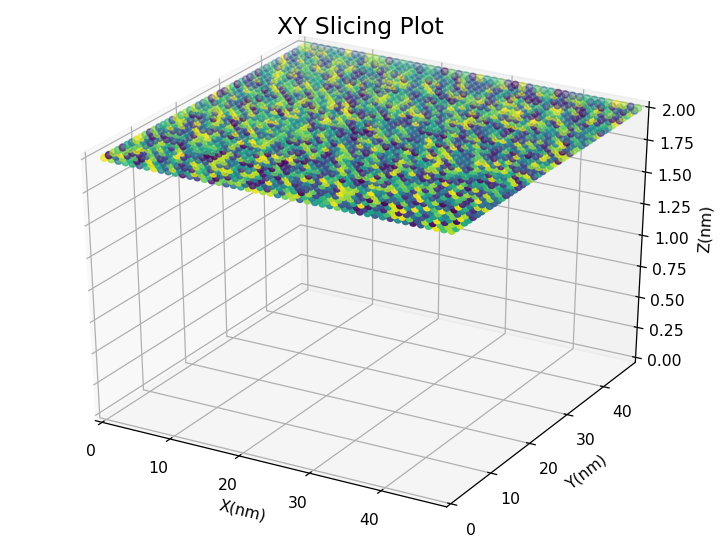

MovieWriter ffmpeg unavailable.


In [10]:
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib notebook
%matplotlib notebook

# Set up plotting
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=10)
ax.set_ylabel('Y(nm)', fontsize=10)
ax.set_zlabel('Z(nm)', fontsize=10)
ax.set_title('XY Slicing Plot', fontsize=15)
ims = []
for add in np.arange(10):
    ims.append((ax.scatter(x, y, zs=z[add*50],c=data.iloc[add*50,1:]),))
im_ani = animation.ArtistAnimation(fig,ims,interval=500,blit=True)
plt.show()
im_ani.save('XY slice_1.htm', metadata={'artist':'Guido'})

# Animation 3d yz slice:(successful!!) (save htm successfully!!)

In [6]:
matplotlib.use("Agg")
z = data.iloc[:,0]
z_approach = z[:500]
z_retract = z[500:]

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#----------------------------------------------------------------------------------------------------------------
# Set up plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('YZ Slicing Plot for the AFM Phase Shift', fontsize=20)
#----------------------------------------------------------------------------------------------------------------
ims = []
for add in np.arange(8):
    a = np.linspace(0, 47, 48)[add*6]
    b = np.linspace(0, 47, 48)
    c = z_approach
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(len(c)):
        for i in range(len(b)):
            B = (pd.DataFrame(pslist[k]).transpose().iloc[add*6])[i]
            psasas.append(B)
    l = psasas
    
    ims.append((ax.scatter(x, y, z,c=l),))
im_ani = animation.ArtistAnimation(fig,ims,interval=500,blit=True)
plt.show()
im_ani.save('YZ slice.htm', metadata={'artist':'Guido'})

C:\software\miniconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\software\miniconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\software\miniconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\software\miniconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\software\miniconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\software\miniconda\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\software\miniconda\lib\site-pac

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

# Animation 3d XZ slice:

<IPython.core.display.Javascript object>


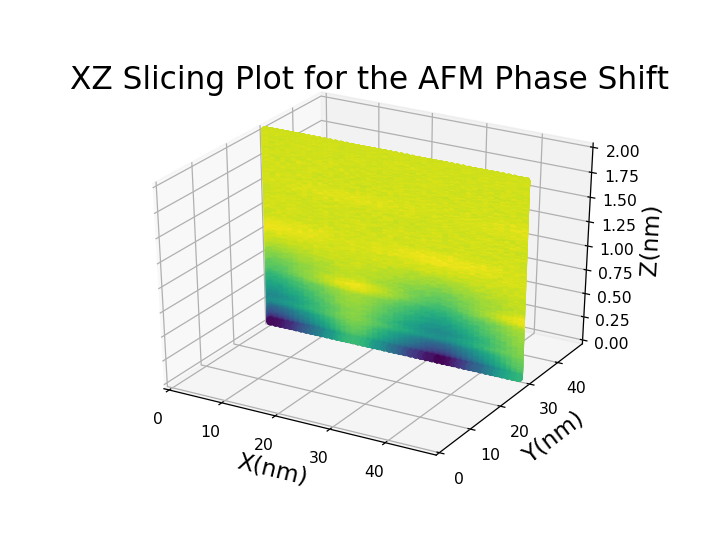

MovieWriter ffmpeg unavailable.


In [50]:
z = data.iloc[:,0]
z_approach = z[:500]
z_retract = z[500:]

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#----------------------------------------------------------------------------------------------------------------
# Set up plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('XZ Slicing Plot for the AFM Phase Shift', fontsize=20)
#----------------------------------------------------------------------------------------------------------------
ims = []
for add in np.arange(8):
    a = np.linspace(0, 47, 48)
    b = np.linspace(0, 47, 48)[add*6]
    c = z_approach
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(len(c)):
        for i in range(48):
            B = (pd.DataFrame(pslist[k]).transpose().iloc[add*6])[i]
            psasas.append(B)
    l = psasas
    
    ims.append((ax.scatter(x, y, z,c=l),))
im_ani = animation.ArtistAnimation(fig,ims,interval=500,blit=True)
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#im_ani.save('XZ slice.mp4', writer=writer)
im_ani.save('XZ slice.htm', metadata={'artist':'Guido'})

# Animation 3d XY slice(RL):

<IPython.core.display.Javascript object>


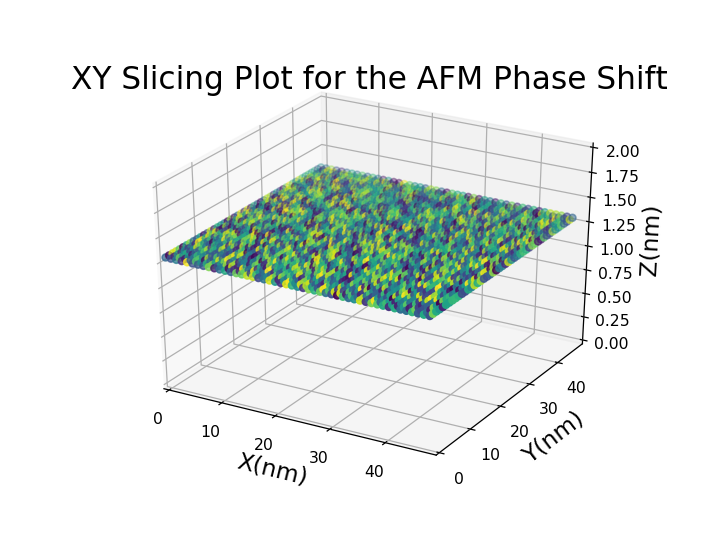

MovieWriter ffmpeg unavailable.


In [53]:
z = data.iloc[:,0]
z_approach = z[:500]
z_retract = z[500:]

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#----------------------------------------------------------------------------------------------------------------
# Set up plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('XY Slicing Plot for the AFM Phase Shift', fontsize=20)
#----------------------------------------------------------------------------------------------------------------
ims = []
for add in np.arange(10):
    a = np.linspace(0, 47, 48)
    b = np.linspace(0, 47, 48)
    c = z_approach[add*50]
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(48):
        for i in range(len(b)):
            B = (pd.DataFrame(pslist[add*50]).transpose().iloc[k])[i]
            psasas.append(B)
    l = psasas
    
    ims.append((ax.scatter(x, y, z,c=l),))
im_ani = animation.ArtistAnimation(fig,ims,interval=500,blit=True)
plt.show()
im_ani.save('XY slice_2.htm', metadata={'artist':'Guido'})

# Try to put 3 animation together:

<IPython.core.display.Javascript object>


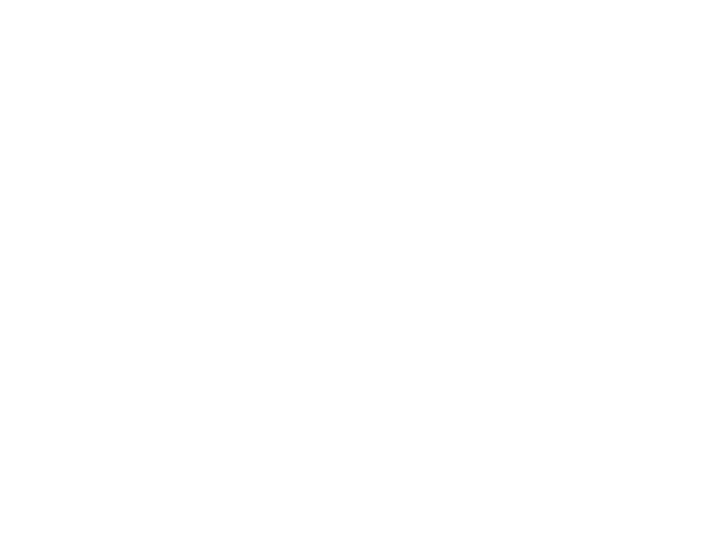

MovieWriter ffmpeg unavailable.


In [12]:
z = data.iloc[:,0]
z_approach = z[:500]
z_retract = z[500:]

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#----------------------------------------------------------------------------------------------------------------
# Set up plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('XY&XZ&YZ Slicing Animation for the AFM Phase Shift', fontsize=20)
#----------------------------------------------------------------------------------------------------------------
ims = []
for add in np.arange(10):
    a = np.linspace(0, 47, 48)
    b = np.linspace(0, 47, 48)
    c = z_approach[add*50]
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(48):
        for i in range(len(b)):
            B = (pd.DataFrame(pslist[add*50]).transpose().iloc[k])[i]
            psasas.append(B)
    l = psasas
    ims.append((ax.scatter(x, y, z,c=l),))         #XY slice
    
for add in np.arange(8):
    a = np.linspace(0, 47, 48)
    b = np.linspace(0, 47, 48)[add*6]
    c = z_approach
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(len(c)):
        for i in range(48):
            B = (pd.DataFrame(pslist[k]).transpose().iloc[add*6])[i]
            psasas.append(B)
    l = psasas
    ims.append((ax.scatter(x, y, z,c=l),))       #XZ slice
    
for add in np.arange(8):
    a = np.linspace(0, 47, 48)[add*6]
    b = np.linspace(0, 47, 48)
    c = z_approach
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(len(c)):
        for i in range(len(b)):
            B = (pd.DataFrame(pslist[k]).transpose().iloc[add*6])[i]
            psasas.append(B)
    l = psasas
    
    ims.append((ax.scatter(x, y, z,c=l),))       #YZ slice

im_ani = animation.ArtistAnimation(fig,ims,interval=500,blit=True)
plt.show()
im_ani.save('XY&XZ&YZ slice.htm', metadata={'artist':'Guido'})

# 2d xy slice:

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
a=np.linspace(1,48,48)
b=np.linspace(1,48,48)  
x,y=np.meshgrid(a,b)

p = ax.scatter(x, y, z[400],c=data.iloc[0,1:])

## 2d zy slice:

In [ ]:
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("PHASEdata.csv")

data.rename(columns={'Phase ': 'Unnamed: 1'}, inplace=True)
#Replace unnamed columns with numerical values.
i = iter(range(1, len(data.columns) + 1))
data.columns = [x if not x.startswith('Unnamed') else next(i) for x in data.columns]
data = pd.DataFrame(data)

#Create just the retraction data
retract = data[-502:]
retract = retract.drop(['Z (nm)'], axis=1)

#Convert DF to numpy array and reshape so we have 502 [48x48] matrices
retract_as_numpy = retract.as_matrix(columns=None)
retract_as_numpy_reshape = np.array(retract_as_numpy.tolist())
retract_as_numpy_reshape1 = retract_as_numpy.reshape(502,48,48)

zy_slice = retract_as_numpy_reshape1[:,1,:]

a = np.linspace(0, 501, 502)
b = np.linspace(0, 47, 48)
x, y = np.meshgrid(b, a)
l = zy_slice


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(x, y, c = l, alpha=0.9)
ax.set_xlabel('Y(nm)', fontsize=15)
ax.set_ylabel('Z(nm)', fontsize=15)
ax.set_title('3D Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()
